In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r"C:\Users\modyr\Desktop\Youtube Analysis\Youtube_Data_Analysis\yt_data.csv")

df.head()


,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
0,KbiwL74KyJQ,Shrek 5 Cast Announcement,Shrek 5 - In Theaters Christmas 2026\n\nFar Fa...,2025-02-27T16:01:18Z,UCq0OueAsdxH6b8nyAspwViw,Universal Pictures,24,[],PT28S,hd,False,7197282,150167,0,0,0
1,W7FTkUFU7nw,Pokémon Presents | 2.27.2025,"Happy Pokémon Day, Trainers! \nThe latest Poké...",2025-02-27T14:00:06Z,UCFctpiB_Hnlk3ejWfHqSm6Q,The Official Pokémon YouTube channel,20,"['Pokemon', 'pokemon', 'pokemon\ncharacters', ...",PT19M16S,hd,False,3472768,154073,0,0,18217
2,8B1EtVPBSMw,A Minecraft Movie | Final Trailer,Get ready for the greatest adventure ever buil...,2025-02-27T20:00:04Z,UCjmJDM5pRKbUlVIzDYYWb6g,Warner Bros.,1,"['2025', 'Coming Soon', 'Danielle Brooks', 'Em...",PT2M31S,hd,True,9356733,230156,0,0,22114
3,r5VRqWkFpEQ,LISA - FUTW (Vixi Solo Version) (Official Musi...,"LISA’s debut album, ‘Alter Ego’ is out now. Li...",2025-02-28T05:01:26Z,UC6-BgjsBa5R3PZQ_kZ8hKPg,LLOUD Official,10,"['Blackpink', 'Lisa', 'Music', 'Fashion', 'K-P...",PT3M48S,hd,False,6930843,947843,0,0,62537
4,vONxgCQWZCA,YoungBoy Never Broke Again - 5 Night [Official...,YoungBoy Never Broke Again – 5 Night\nNew Mus...,2025-02-28T06:32:53Z,UClW4jraMKz6Qj69lJf-tODA,YoungBoy Never Broke Again,10,"['YoungBoy Never Broke Again', 'NBA YoungBoy',...",PT3M16S,hd,False,451231,56097,0,0,5627


-   Now, let's identify videos with highest view count by channel name

In [5]:
df.columns

Index(['video_id', 'title', 'description', 'published_at', 'channel_id',
       'channel_title', 'category_id', 'tags', 'duration', 'definition',
       'caption', 'view_count', 'like_count', 'dislike_count',
       'favorite_count', 'comment_count'],
      dtype='object')

In [6]:
# let's see the top 10 videos by view count
top_viewed_videos = df.sort_values(by='view_count', ascending=False).head(10)

top_viewed_videos

,video_id,title,description,published_at,channel_id,channel_title,category_id,tags,duration,definition,caption,view_count,like_count,dislike_count,favorite_count,comment_count
154,NDsO1LT_0lw,I Spent 100 Hours Inside The Pyramids!,I can’t believe we were allowed to do this\nSe...,2025-02-08T17:00:00Z,UCX6OQ3DkcsbYNE6H8uQQuVA,MrBeast,24,[],PT21M43S,hd,True,145644593,4571055,0,0,91668
82,KDorKy-13ak,Kendrick Lamar's Apple Music Super Bowl Halfti...,Watch hip-hop’s MVP put on an epic performance...,2025-02-10T03:22:55Z,UCDVYQ4Zhbm3S2dlz7P1GBDg,NFL,17,"['NFL', 'Football', 'American Football', 'spor...",PT13M21S,hd,False,90992941,3000230,0,0,173531
197,mFuyX1XgJFg,Introducing iPhone 16e - February 19,The latest iPhone at the greatest price — iPho...,2025-02-19T16:12:20Z,UCE_M8A5yxnLfW0KghEeajjw,Apple,28,"['Apple', 'Apple announcement', 'Apple Launch'...",PT12M50S,hd,True,22292593,221377,0,0,0
152,eWAdpUyzCkI,"JENNIE, Doechii - ExtraL (Official Video)",Official music video for “ExtraL” by JENNIE & ...,2025-02-21T05:00:40Z,UCN9_L9lA9kqJbGANLRus_1A,JennieRubyJaneVEVO,10,"['JENNIE', 'Jennie Kim', 'JENNIE MV', 'JENNIE ...",PT3M41S,hd,True,20742638,1562855,0,0,83848
110,XhW3i2f54BQ,HIT 3 Teaser : Sarkaar's Laathi | Nani | Saile...,Watch #HIT3Teaser : Sarkaar's Laathi on Wall P...,2025-02-24T05:37:32Z,UC-seBZmnGCMWm9aCHL2WcNQ,Wall Poster Cinema,1,"['Hit 3', 'Nani 32', 'Wallposter Cinemas', 'HI...",PT1M45S,hd,True,19460525,419671,0,0,8503
9,jl-sgSDwJHs,Good Bad Ugly Tamil Teaser | Ajith Kumar | Tri...,Good Bad Ugly Tamil Teaser on Mythri Movie Mak...,2025-02-28T13:32:07Z,UCKZSn5C-RzrLjuWJF8wWiDw,Mythri Movie Makers,24,"['Good Bad Ugly Tamil Teaser', 'Ajith Kumar', ...",PT1M30S,hd,True,17983281,651325,0,0,41407
75,o9DhvbqYzns,G-DRAGON - TOO BAD (feat. Anderson .Paak) (Off...,"Listen to the Album “Übermensch"". OUT NOW!\n🎼 ...",2025-02-25T05:02:00Z,UCeU5qTuBiqTU5z-hyL6WITQ,OfficialGDRAGON,22,[],PT2M40S,hd,True,15455882,530050,0,0,36042
129,SD2UiX1jpd8,IS THIS THE BEST BRAWLER EVER?!,"IMPROVED REWARDS FOR F2P, A FULL RANKED REWORK...",2025-02-22T16:00:06Z,UCooVYzDxdwTtGYAkcPmOgOw,Brawl Stars,20,"['brawl stars', 'mobile game', 'mobile strateg...",PT10M9S,hd,True,14710250,505029,0,0,53388
35,KNxv88wUgnM,"Karan Aujla, OneRepublic, Disha Patani, Ikky -...",Listen to Tell Me now: https://karanaujla.lnk....,2025-02-27T17:59:51Z,UC3XBkDeCVXCoCofFgfUZXGw,Karan Aujla,10,"['karan aujla', 'onerepublic', 'karan aujla on...",PT3M22S,hd,False,12339629,257406,0,0,11261
84,I8I51kSq448,G-DRAGON - DRAMA (Official Video),"Listen to the Album “Übermensch"". OUT NOW!\n🎼 ...",2025-02-25T05:01:06Z,UCeU5qTuBiqTU5z-hyL6WITQ,OfficialGDRAGON,22,[],PT4M5S,hd,True,10816029,407228,0,0,29451


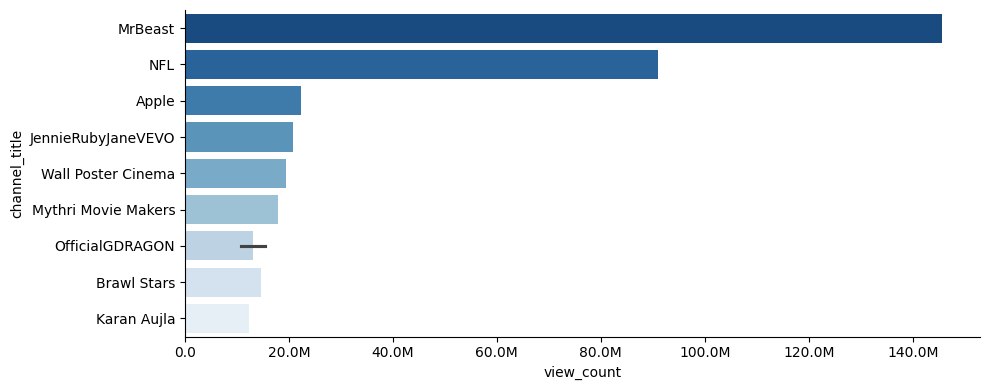

In [18]:
plt.figure(figsize=(10, 4))
sns.barplot(data=top_viewed_videos, 
            x='view_count', 
            y='channel_title',
            palette='Blues_r'
            
            )

# Function to format the values
def num_format(x, pos):
    if x >= 1e6:
        return '{:1.1f}M'.format(x*1e-6)
    elif x >= 1e3:
        return '{:1.1f}K'.format(x*1e-3)
    else:
        return '{:1.1f}'.format(x)

# Applying the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(num_format))

sns.despine()
plt.tight_layout()
plt.show()